# Installation
Run the cell below once at the beginning of each session to install the se-lib library.  The ``from selib import *`` statement will import all its functions and classes to be called with no alias.  

In [14]:
!pip install -q se-lib

from selib import *

# System Dynamics Modeling with se-lib – User's Guide

### August 5, 2025

## Table of Contents

- [1. Overview](#1-overview)
- [2. Getting Started with se-lib](#2-getting-started-with-se-lib)
- [3. Modeling Guidance and Tips](#3-modeling-guidance-and-tips)
- [4. Basic Modeling Patterns](#4-basic-modeling-patterns)
  - [4.1 Negative Feedback Loop](#41-negative-feedback-loop)
  - [4.2 Exponential Growth](#42-exponential-growth)
  - [4.3 Balancing Loop](#43-balancing-loop)
  - [4.4 Goal-Gap Structure](#44-goal-gap-structure)
  - [4.5 First-Order Delay](#45-first-order-delay)
  - [4.6 Second-Order Delay](#46-second-order-delay)
- [5. Displaying Output](#5-displaying-output)
- [6. Graphing Functions](#6-graphing-functions)
- [7. Random Number Functions](#7-random-number-functions)
- [8. Utility and Test Functions](#8-utility-and-test-functions)
  - [8.1 Pulse Function](#81-pulse-function)
  - [8.2 Step Function](#82-step-function)
  - [8.3 Ramp Function](#83-ramp-function)
- [9. Advanced Usage](#9-advanced-usage)
- [9.1 Extending a Model Instance](#91-extending-a-model-instance)
- [10. Appendix A - Function Reference](#10-appendix-a---function-reference)

---

<a name="1-overview"></a>
## 1. Overview

This manual provides an introduction and reference for modeling continuous systems using the *se-lib* Python package. se-lib supports the construction and simulation of system dynamics models using standard stock and flow structures using both procedural and object-oriented approaches. It adheres to the XMILE standard for system dynamics models and integrates with [PySD](https://pysd.readthedocs.io/) for simulation execution. Models are compatible with Vensim and iThink/Stella tools using XMILE and MDL formats for importing and exporting.

The object-oriented interface is built around the `SystemDynamicsModel` class, enabling encapsulation of models, concurrent instantiation, and extensions of the model class. Users may also use the original procedural API for quick prototyping or compatibility with existing scripts.  The procedural approach provides a more implicit modeling, but can be less flexible.

The manual includes reusable modeling templates, core system dynamics patterns such as goal-gap control and balancing loops, recommended modeling practices, detailed API documentation, and visual representations of feedback logic. It is suitable for a wide range of applications in systems thinking, behavioral simulation, engineering analysis, and education.

Detailed function references and more examples are available online at http://selib.org/function_reference.html#system-dynamics.


---

<a name="2-getting-started-with-se-lib"></a>
## 2. Getting Started with SE-Lib

To install the latest version of se-lib, use pip:

```
pip install se-lib
```

A system model is described by defining the standard elements for stocks (levels), flows (rates),
and auxiliary constants or equations. Utility functions are available for equation formulation, data collection and displaying
output.

Model construction begins by importing se-lib and initializing a model with the required time parameters. Simulations operate over a user-defined time horizon and return data as pandas DataFrames, which can be used for analysis and visualization.

```python
from selib import *
init_sd_model(start=0, stop=30, dt=1)
```

Refer to Section 11 for a complete description of the modeling API.

---

<a name="3-modeling-guidance-and-tips"></a>
## 3. Modeling Guidance and Tips

Modeling with se-lib requires attention to syntax, naming conventions, and logical structure. Names of model elements are specified as character strings and should not contain spaces; underscores (`_`) must be used to separate terms (e.g., `Production_Rate`). Variable names are case-sensitive and must exactly match those used in equations.

Equations are expressed as strings using standard arithmetic operators. Variables referenced in equations must already be defined within the model scope. The simulator does not check equations at entry time, so errors from undefined variables or misspellings will only become apparent at runtime.

Conditional statements can be expressed with logical constructs `or`, `and`, and `not` or the XMILE uppercase standards `OR`, `AND`, and `NOT`.  The `if_then_else(condition, value if true, value if false)` or uppercase `IF_THEN_ELSE(condition, value if true, value if false)` are available.

Random number functions such as `random()` and `random.uniform(a, b)` are supported and internally translated into XMILE-compliant expressions. These generate new values at each timestep and are useful for modeling uncertainty or variability in external influences.

Time in se-lib is dimensionless. Modelers must maintain consistency in time unit interpretation (e.g., using all variables in units of days, months, etc.). Inconsistent use of time units can lead to misleading or invalid results.

The `draw_model()` function is recommended for verifying model structure prior to simulation. This visual representation helps ensure the correctness of stock-flow relationships and the presence of intended feedback loops.

---

<a name="4-basic-modeling-patterns"></a>
## 4. Basic Modeling Patterns

<a name="41-negative-feedback-loop"></a>
### 4.1 Negative Feedback Loop

This classic balancing structure adjusts a level toward a target over time. It works by calculating the gap between a goal and the current level, then feeding a corrective flow in the direction that reduces this gap. The delay serves as a time constant, governing the speed of the system's response. Over time, the level asymptotically approaches the goal value.

```python
from selib import *

# negative feedback
init_sd_model(start=0, stop=5, dt=.1)
add_stock("level", 50, inflows=["rate"])
add_auxiliary("delay", .5)
add_auxiliary("goal", 100)
add_flow("rate", "(goal - level) / delay")

draw_model()
run_model()
plot_graph("level")
```

![negative_feedback_diagram](https://github.com/se-lib/se-lib/raw/main/docs/figures/negative_feedback_diagram.svg)

![negative_feedback_run_output](https://github.com/se-lib/se-lib/raw/main/docs/figures/negative_feedback_run_output.png)

![negative_feedback_level_graph](https://github.com/se-lib/se-lib/raw/main/docs/figures/negative_feedback_level_graph.svg)


<a name="42-exponential-growth"></a>
### 4.2 Exponential Growth

This reinforcing loop demonstrates positive feedback. The flow increases as the stock increases, which in turn further amplifies the flow. This results in exponential behavior and is frequently seen in unchecked population growth, viral spread, or compound interest.

```python
from selib import *

# exponential growth
init_sd_model(start=0, stop=10, dt=.5)
add_stock("level", 100, inflows=["rate"])
add_auxiliary("growth_fraction", .8)
add_flow("rate", "growth_fraction * level")

draw_model()
run_model()
plot_graph('level')
```

![exponential_growth_diagram](https://github.com/se-lib/se-lib/raw/main/docs/figures/exponential_growth_model_diagram.svg)

![exponential_growth_run_output](https://github.com/se-lib/se-lib/raw/main/docs/figures/exponential_growth_run_output.png)

![exponential_growth_level_graph](https://github.com/se-lib/se-lib/raw/main/docs/figures/exponential_growth_graph_output.svg)


<a name="43-balancing-loop"></a>
### 4.3 Balancing Loop

A balancing loop with inventory control adjusts production to maintain a desired stock level. When inventory falls below target, production increases; when it's above target, production slows. This loop exhibits goal-seeking behavior and helps stabilize system performance. External demand acts as an opposing outflow.

```python
from selib import *

init_sd_model(0, 10, 1)
add_stock("Inventory", 50, inflows=["Production_Rate"], outflows=["Demand_Rate"])
add_auxiliary("Target_Inventory", 100)
add_auxiliary("Adj_Time", 4)
add_flow("Production_Rate", "(Target_Inventory - Inventory) / Adj_Time")
add_auxiliary("Demand", 10)
add_flow("Demand_Rate", "Demand")

draw_model()
run_model()
plot_graph(["Inventory", "Production_Rate"])
```

![balancing_loop_model_diagram](https://github.com/se-lib/se-lib/raw/main/docs/figures/balancing_loop_model_diagram.svg)

![balancing_loop_model_run_output](https://github.com/se-lib/se-lib/raw/main/docs/figures/balancing_loop_model_run_output.png)

![balancing_loop_model_output](https://github.com/se-lib/se-lib/raw/main/docs/figures/balancing_loop_model_output.svg)

<a name="44-goal-gap-structure"></a>
### 4.4 Goal-Gap Structure

This control structure reduces the deviation between a system's state and a set point. A feedback signal (difference between goal and current value) is amplified by a gain factor and used to drive the stock toward the goal.

```python
from selib import *

init_sd_model(0, 30, 1)
add_stock("Temperature", 20, inflows=["Heating"])
add_auxiliary("Set_Point", 22)
add_auxiliary("Gain", 1.5)
add_flow("Heating", "(Set_Point - Temperature) * Gain")

draw_model()
run_model()
plot_graph(["Temperature", "Set_Point"])
```

![goal_gap_structure_delay_model_diagram](https://github.com/se-lib/se-lib/raw/main/docs/figures/goal_gap_structure_model_diagram.svg)

![goal_gap_structure_model_run_output](https://github.com/se-lib/se-lib/raw/main/docs/figures//goal_gap_structure_model_run_output.png)

![goal_gap_structure_model_output](https://github.com/se-lib/se-lib/raw/main/docs/figures//goal_gap_structure_model_output.svg)

<a name="45-first-order-delay"></a>
### 4.5 First-Order Delay

First-order delays represent lagged responses where a stock adjusts toward an input with exponential smoothing. The greater the delay time, the slower the convergence.

```python
from selib import *

init_sd_model(0, 15, 1)
add_stock("Output", 0, inflows=["Flow"])
add_auxiliary("Input", 100)
add_auxiliary("Delay_Time", 5)
add_flow("Flow", "(Input - Output) / Delay_Time")

draw_model()
run_model()
plot_graph(["Input", "Output"])
```

![first_order_delay_model_diagram](https://github.com/se-lib/se-lib/raw/main/docs/figures/first_order_delay_model_diagram.svg)

![first_order_delay_model_run_output](https://github.com/se-lib/se-lib/raw/main/docs/figures/first_order_delay_model_run_output.png)

![first_order_delay_model_output](https://github.com/se-lib/se-lib/raw/main/docs/figures/first_order_delay_model_output.svg)

<a name="46-second-order-delay"></a>
### 4.6 Second-Order Delay

A second-order delay structure creates smoother responses by cascading two first-order delays. This is useful when modeling systems with inertia or buffer stages such as material transport, bureaucratic processes, or cognitive recognition lags.

```python
from selib import *

init_sd_model(0, 30, 1)
add_stock("Stage1", 0, inflows=["Flow1"], outflows=["Flow2"])
add_stock("Stage2", 0, inflows=["Flow2"])
add_auxiliary("Input", 100)
add_auxiliary("DelayTime", 5)
add_flow("Flow1", "(Input - Stage1) / DelayTime")
add_flow("Flow2", "(Stage1 - Stage2) / DelayTime")

draw_model()
run_model()
plot_graph(["Stage1", "Stage2"])
```

![second_order_delay_model_diagram](https://github.com/se-lib/se-lib/raw/main/docs/figures/second_order_delay_model_diagram.svg)

![second_order_delay_model_run_output](https://github.com/se-lib/se-lib/raw/main/docs/figures/second_order_delay_model_run_output.png)

...

![second_order_delay_model_output](https://github.com/se-lib/se-lib/raw/main/docs/figures/second_order_delay_model_output.svg)




---

<a name="5-displaying-output"></a>
## 5. Displaying Output

Upon execution of a system dynamics model, se-lib returns simulation results as a `pandas.DataFrame` object. This output contains the time-indexed values of all defined stocks, flows, and auxiliaries. The DataFrame facilitates further analysis, visualization, or export to external tools.
The ```run_model()`` function will execute a simulation and display a Pandas dataframe of the output.  To execute a model and capture its output:

```python
results = run_model()
```

Each column in the DataFrame corresponds to a model variable, and each row represents a timestep, as defined by the start, stop, and `dt` parameters provided during model initialization.

To inspect specific variables or values at particular timesteps, standard pandas indexing may be used:

```python
results['Population']               # Full time series for Population
results['Births'][10]              # Value of Births at the 10th timestep
results[['Population', 'Births']] # Multiple variables
```

This structured output enables direct integration with plotting functions, statistical analysis routines, or export mechanisms. All graphing and saving operations described in Section 6 operate directly on this result structure.

---

<a name="6-graphing-functions"></a>
## 6. Graphing Functions

se-lib provides built-in graphing capabilities to visualize model outputs directly from the simulation results. These graphs are generated using the `matplotlib` library and support both single-variable and multi-variable plots.

### Plotting to Screen

The `plot_graph()` function displays simulation results interactively. It supports multiple input formats: single variable names, separate arguments, or a list of variables.

```python
plot_graph("Population")
plot_graph("Births", "Deaths")
plot_graph(["Population", "Births", "Deaths"])
```

When a list is used, variables are plotted together on a shared axis. When passed as separate arguments, they are displayed on individual subplots.

### Saving to File

The `save_graph()` function saves output graphs to image files. The default format is PNG, and the format may be changed by modifying the filename extension.

```python
save_graph("Population", filename="population_plot.png")
save_graph(["Births", "Deaths"], filename="flow_graph.svg")
```

Saved graphs are rendered as separate figures and written to disk, which is useful for reporting or presentation workflows. As with plotting, graphing functions operate on the output returned by `run_model()`.

---

<a name="7-random-number-functions"></a>
## 7. Random Number Functions

se-lib supports stochastic modeling using random number generation within auxiliary and flow equations. This allows the representation of uncertainty, noise, or nondeterministic behavior in the modeled system.  In equations for auxiliaries and rates, the random number functions supported are called
as if the following import has occurred: ```from random import random, random.uniform```.  

The random functions supported are:

- `random()`: returns a new float uniformly distributed between 0 and 1 at each timestep.
- `random.uniform(min, max)`: returns a new float uniformly distributed between `min` and `max` at each timestep.

These functions are automatically translated to XMILE-compatible expressions when the model is compiled for simulation.  For xmile format compatibility, the functions ```RANDOM_0_1``` and ```RANDOM_UNIFORM(min, max)``` are equivalent and also acceptable.

### Example

The following example defines an auxiliary variable using random noise:

```python
init_sd_model(start=0, stop=3, dt=.5)
add_auxiliary("random_parameter", "20*random()")
run_model()
```

```
( INITIAL TIME FINAL TIME TIME STEP SAVEPER random_parameter
0.0 0 3 0.5 0.5 0.087466
0.5 0 3 0.5 0.5 11.174929
1.0 0 3 0.5 0.5 13.506344
1.5 0 3 0.5 0.5 4.342211
2.0 0 3 0.5 0.5 5.449781
2.5 0 3 0.5 0.5 7.323554
3.0 0 3 0.5 0.5 17.220789,
```

Each timestep generates a new random value for `Stochastic_Input`, producing a non-repeating time series. It is important to note that random values are recomputed each time the model is run, and results may vary unless reproducibility measures (e.g., seeding) are implemented outside SE-Lib.

---

<a name="8-utility-and-test-functions"></a>
## 8. Utility and Test Functions
Standard test functions are available for pulse, ramp and step inputs as shown below.
```python
init_sd_model(0, 10, 1)
add_stock("Level", 0, inflows=["Pulse", "Ramp"])
add_flow("Pulse", "pulse(100, 2)")
add_flow("Ramp", "ramp(3, 5)")
run_model()
plot_graph("Pulse", "Ramp", "Level")
```

<a name="81-pulse-function"></a>
### 8.1 Pulse Function

The `pulse` function introduces a temporary, instantaneous value such as a sudden flow injection into a stock at a specific time. This is used to model sudden, short-term shocks to a system, such as a one-time product launch, a financial bailout, or a natural disaster. The model below demonstrates how a pulse of a specific magnitude is added to a stock at a given point in time, causing an immediate jump in the stock's value.

```python
from selib import *

# Pulse input
init_sd_model(start=0, stop=10, dt=0.5)
add_stock("Level", 0, inflows=["Pulse Input"])
add_flow("Pulse Input", "pulse(10, 3)")

draw_model()
run_model()
plot_graph(["Pulse Input", "Level"])
```

![pulse_input_model](https://github.com/se-lib/se-lib/raw/main/docs/figures/pulse_input_model.svg)


![pulse_input](https://github.com/se-lib/se-lib/raw/main/docs/figures/pulse_input.svg)

<a name="82-step-function"></a>
### 8.2 Step Function

The `step` function introduces a sudden, permanent change to a variable at a specified time. This is useful for analyzing how a system responds to a step-change in an input, such as a new policy implementation or a sudden shift in market conditions. The model below demonstrates the effect of a step function on a stock, showing how the stock's value begins to change at the step time.

```python
from selib import *

# Step function stimulation
init_sd_model(start=0, stop=10, dt=0.5)
add_stock("Level", 0, inflows=["Step_Input"])
add_flow("Step_Input", "step(10, 3)")

draw_model()
run_model()
plot_graph("Level")
```

<a name="83-ramp-function"></a>
### 8.3 Ramp Function
The ramp function simulates a continuous, linear increase or decrease in a variable over a defined period. This is useful for modeling scenarios with gradual changes, such as a steady rise in raw material costs, a phased deployment of a new technology, or a consistent population decline. The model below shows a flow input increasing at a constant rate after a specified start time.

```python
from selib import *

# Ramp function stimulation
init_sd_model(start=0, stop=10, dt=0.5)
add_stock("Level", 0, inflows=["Ramp_Input"])
add_flow("Ramp_Input", "ramp(2, 3)")

draw_model()
run_model()
plot_graph(["Ramp Input", "Level"])
```


![ramp_input_model](https://github.com/se-lib/se-lib/raw/main/docs/figures/ramp_input_model.svg)


|time|INITIAL TIME|FINAL TIME|TIME STEP|SAVEPER|Ramp Input|Level|
|---|---|---|---|---|---|---|
|0\.0|0|10|0\.5|0\.5|0\.0|0\.0|
|0\.5|0|10|0\.5|0\.5|-0\.0|0\.0|
|1\.0|0|10|0\.5|0\.5|-0\.0|0\.0|
|1\.5|0|10|0\.5|0\.5|-0\.0|0\.0|
|2\.0|0|10|0\.5|0\.5|-0\.0|0\.0|
|2\.5|0|10|0\.5|0\.5|-0\.0|0\.0|
|3\.0|0|10|0\.5|0\.5|0\.0|0\.0|
|3\.5|0|10|0\.5|0\.5|1\.0|0\.0|
|4\.0|0|10|0\.5|0\.5|2\.0|0\.5|
|4\.5|0|10|0\.5|0\.5|3\.0|1\.5|
|5\.0|0|10|0\.5|0\.5|4\.0|3\.0|
|5\.5|0|10|0\.5|0\.5|5\.0|5\.0|
|6\.0|0|10|0\.5|0\.5|6\.0|7\.5|
|6\.5|0|10|0\.5|0\.5|7\.0|10\.5|
|7\.0|0|10|0\.5|0\.5|8\.0|14\.0|
|7\.5|0|10|0\.5|0\.5|9\.0|18\.0|
|8\.0|0|10|0\.5|0\.5|10\.0|22\.5|
|8\.5|0|10|0\.5|0\.5|11\.0|27\.5|
|9\.0|0|10|0\.5|0\.5|12\.0|33\.0|
|9\.5|0|10|0\.5|0\.5|13\.0|39\.0|
|10\.0|0|10|0\.5|0\.5|14\.0|45\.5|


![ramp](https://github.com/se-lib/se-lib/raw/main/docs/figures/ramp.svg)

The full set
of [functions available in PySD](https://pysd.readthedocs.io/en/master/structure/xmile_translation.html#xmile-supported-functions) can be used but have not all been tested.

---

<a name="9-advanced-usage"></a>
## 9.  Advanced Usage

<a name="91-extending-a-model-instance"></a>
### 9.1 Extending a Model Instance

Create a new class that extends a population model by adding carrying capacity with the following.

```python
class PopulationWithCapacityModel(SystemDynamicsModel):
    def __init__(self, start, stop, dt, initial_population, carrying_capacity):
        super().__init__(start, stop, dt)
        self.add_stock("Population", initial=initial_population, inflows=["Births"], outflows=["Deaths"])
        self.add_auxiliary("BirthRate", equation=0.02)
        self.add_auxiliary("CarryingCapacity", equation=carrying_capacity)
        self.add_auxiliary("CrowdingEffect", equation="Population / CarryingCapacity")
        self.add_auxiliary("EffectiveGrowthRate", equation="BirthRate * (1 - CrowdingEffect)")
        self.add_flow("Births", equation="Population * EffectiveGrowthRate")
        self.add_auxiliary("DeathRate", equation=0.01)
        self.add_flow("Deaths", equation="Population * DeathRate") # Keep a simple death rate

# Create an instance of the extended model
population_capacity_model = PopulationWithCapacityModel(start=0, stop=200, dt=1, initial_population=50, carrying_capacity=500)
```

### 9.1 PySD Integration

SE-Lib is fully compatible with PySD. Any PySD function or supported XMILE structure may be used where appropriate. See [PySD Docs](https://pysd.readthedocs.io/) for advanced formulations.

---

<a name="10-appendix-a---function-reference"></a>
## 10. Appendix A - Function Reference

The following functions and methods define the modeling API for se-lib. All functions can be used in either procedural or object-oriented workflows.

### `init_sd_model(start, stop, dt, stop_when=None)`
Initializes a new system dynamics model over the specified simulation time frame.

**Args**:
- `start` (float): Start time of the simulation.
- `stop` (float): End time of the simulation.
- `dt` (float): Time step for numerical integration.
- `stop_when` (string): Logical condition using model variables to stop the simulation.

**Returns**:
- SystemDynamicsModel instance

**Example**:
```python
init_sd_model(start=0, stop=50, dt=1.0)
```

**Examples with stop_when**:
```python
init_sd_model(start=0, stop=50, dt=1.0, stop_when("stock1 >= 100")
```

```python
init_sd_model(start=0, stop=50, dt=1.0, stop_when("stock1 >= 100 or stock2 >=80")
```
---

### `add_stock(name, initial, inflows=[], outflows=[])`
Adds a stock variable (level) to the system dynamics model.

**Args**:
- `name` (str): Name of the stock.
- `initial` (float): Initial value of the stock.
- `inflows` (list, optional): Names of inflow variables affecting this stock.
- `outflows` (list, optional): Names of outflow variables affecting this stock.

**Returns**:
- None

**Example**:
```python
add_stock("Population", initial=100, inflows=["Births"], outflows=["Deaths"])
```

---

### `add_flow(name, equation)`
Defines a flow (rate of change) for use in stock updates.

**Args**:
- `name` (str): Name of the flow.
- `equation` (str): Equation as a string to compute the flow value.

**Returns**:
- None

**Example**:
```python
add_flow("Births", "Birth_Rate * Population")
```

---

### `add_auxiliary(name, equation)`
Defines an auxiliary variable or constant used in the model.

**Args**:
- `name` (str): Name of the auxiliary variable.
- `equation` (str): String representation of the equation or constant value.

**Returns**:
- None

**Example**:
```python
add_auxiliary("Birth_Rate", "0.02")
```

---

### `add_auxiliary_lookup(name, input, xpoints, ypoints)`
Creates a lookup function for a nonlinear relationship.

**Args**:
- `name` (str): Name of the auxiliary variable.
- `input` (str): Name of the input variable used in the lookup.
- `xpoints` (list): List of input values (x-axis).
- `ypoints` (list): List of output values (y-axis).

**Returns**:
- None

**Example**:
```python
add_auxiliary_lookup("Saturation", "Population", [0, 1000, 2000], [1, 0.5, 0.1])
```

---

### `plot_graph(*outputs)`
Plots model results using `matplotlib`.

**Args**:
- `*outputs` (str or list): Names of variables to plot (e.g., "Population", ["Births", "Deaths"]).

**Returns**:
- None

**Example**:
```python
plot_graph("Population")
plot_graph(["Births", "Deaths"])
```

---

### `save_graph(*outputs, filename='graph.png')`
Saves a plot of the simulation

### draw_sd_model(filename=None, format='svg')
Generates and renders a visual system dynamics model diagram using Graphviz.

### get_stop_time()
Returns the logical end time based on a stop_when condition.

### get_model_structure()
Returns a dictionary of model components (stocks, flows, auxiliaries).

# Examples

## Exponential Growth


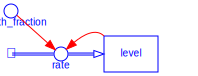

,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,growth_fraction,rate,level
time,,,,,,,
0.0,0,10,0.5,0.5,0.8,80.000000,100.000000
0.5,0,10,0.5,0.5,0.8,112.000000,140.000000
1.0,0,10,0.5,0.5,0.8,156.800000,196.000000
1.5,0,10,0.5,0.5,0.8,219.520000,274.400000
2.0,0,10,0.5,0.5,0.8,307.328000,384.160000
2.5,0,10,0.5,0.5,0.8,430.259200,537.824000
3.0,0,10,0.5,0.5,0.8,602.362880,752.953600
3.5,0,10,0.5,0.5,0.8,843.308032,1054.135040
4.0,0,10,0.5,0.5,0.8,1180.631245,1475.789056


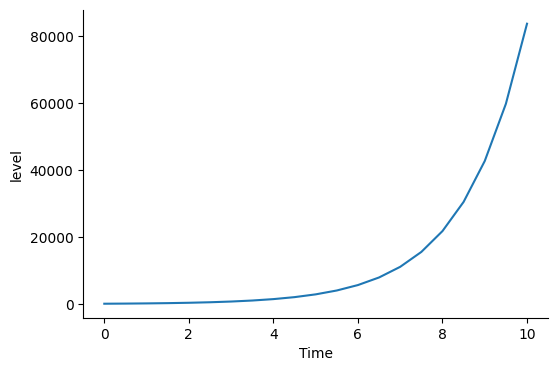

In [15]:
from selib import *

# exponential_growth
init_sd_model(start=0, stop=10, dt=.5)
add_stock("level", 100, inflows=["rate"])
add_auxiliary("growth_fraction", .8)
add_flow("rate", "growth_fraction * level")

draw_model()
run_model()

save_graph('level', filename="exponential_growth.png")

## Negative Feedback


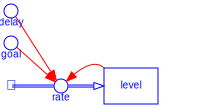

,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,delay,goal,rate,level
time,,,,,,,,
0.0,0,10,0.1,0.1,0.5,100,1.000000e+02,50.00
0.1,0,10,0.1,0.1,0.5,100,8.000000e+01,60.00
0.2,0,10,0.1,0.1,0.5,100,6.400000e+01,68.00
0.3,0,10,0.1,0.1,0.5,100,5.120000e+01,74.40
0.4,0,10,0.1,0.1,0.5,100,4.096000e+01,79.52
...,...,...,...,...,...,...,...,...
9.6,0,10,0.1,0.1,0.5,100,4.973231e-08,100.00
9.7,0,10,0.1,0.1,0.5,100,3.978585e-08,100.00
9.8,0,10,0.1,0.1,0.5,100,3.182868e-08,100.00


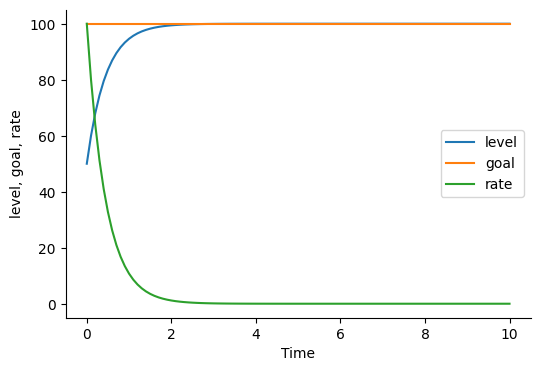

In [16]:
# negative feedback
from selib import *

init_sd_model(start=0, stop=10, dt=.1)
add_stock("level", 50, inflows=["rate"])
add_auxiliary("delay", .5)
add_auxiliary("goal", 100)
add_flow("rate", "(goal - level) / delay")

draw_model()
run_model()

save_graph(['level', 'goal', 'rate'], filename="negative_feedback.svg")

## Goal Seeking Behavior


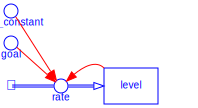

,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,time_constant,goal,rate,level
time,,,,,,,,
0.0,0,10,0.1,0.1,0.5,200,3.000000e+02,50.00
0.1,0,10,0.1,0.1,0.5,200,2.400000e+02,80.00
0.2,0,10,0.1,0.1,0.5,200,1.920000e+02,104.00
0.3,0,10,0.1,0.1,0.5,200,1.536000e+02,123.20
0.4,0,10,0.1,0.1,0.5,200,1.228800e+02,138.56
...,...,...,...,...,...,...,...,...
9.6,0,10,0.1,0.1,0.5,200,1.491970e-07,200.00
9.7,0,10,0.1,0.1,0.5,200,1.193576e-07,200.00
9.8,0,10,0.1,0.1,0.5,200,9.548609e-08,200.00


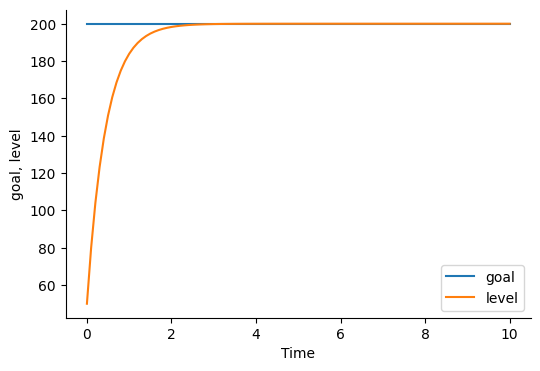

In [17]:
from selib import *

# goal seeking behavior with negative feedback

init_sd_model(start=0, stop=10, dt=.1)
add_stock("level", 50, inflows=["rate"])
add_auxiliary("time_constant", .5)
add_auxiliary("goal", 200)
add_flow("rate", "(goal - level) / time_constant")

draw_model()
run_model()

plot_graph(['goal', 'level'])


## Rayleigh Curve Staffing

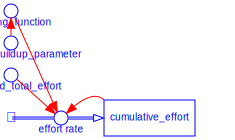

,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,learning_function,manpower_buildup_parameter,estimated_total_effort,effort rate,cumulative_effort
time,,,,,,,,,
0.0,0,6,0.2,0.2,0.0,0.5,30,0.000000,0.000000
0.2,0,6,0.2,0.2,0.1,0.5,30,3.000000,0.000000
0.4,0,6,0.2,0.2,0.2,0.5,30,5.880000,0.600000
0.6,0,6,0.2,0.2,0.3,0.5,30,8.467200,1.776000
0.8,0,6,0.2,0.2,0.4,0.5,30,10.612224,3.469440
1.0,0,6,0.2,0.2,0.5,0.5,30,12.204058,5.591885
1.2,0,6,0.2,0.2,0.6,0.5,30,13.180382,8.032696
1.4,0,6,0.2,0.2,0.7,0.5,30,13.531859,10.668773
1.6,0,6,0.2,0.2,0.8,0.5,30,13.299884,13.375145


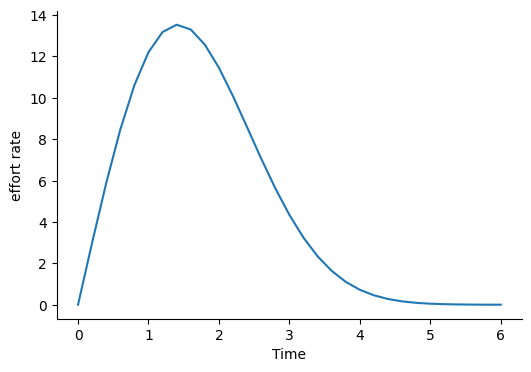

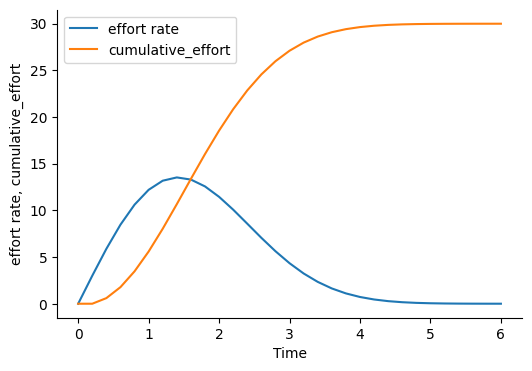

In [18]:
# Rayleigh Curve Staffing
from selib import *

init_sd_model(start=0, stop=6, dt=.2)
add_stock("cumulative_effort", 0, inflows=["effort rate"])
add_flow("effort rate",
         "learning_function * (estimated_total_effort - cumulative_effort)")
add_auxiliary("learning_function", "manpower_buildup_parameter * time")
add_auxiliary("manpower_buildup_parameter", .5)
add_auxiliary("estimated_total_effort", 30)

draw_model()
run_model()

save_graph("effort rate", filename="rayleigh_curve_effort_rate.png")
save_graph(["effort rate", "cumulative_effort"],
           filename="rayleigh_curve_components.png")

## Random Functions and Measuring Stop Time

This example illustrates measuring elapsed simulation time using the ```stop_when``` initialization parameter and ``` get_stop_time()``` function.  It captures the project end when staffing effort rate goes to zero.

In [19]:
from selib import *

init_sd_model(start=0, stop=6, dt=.2, stop_when="effort_rate <= 0")
add_stock("cumulative_effort", 0, inflows=["effort rate"])
add_flow("effort_rate",
    "learning_function * (estimated_total_effort - cumulative_effort)")
add_auxiliary("learning_function", "manpower_buildup_parameter * time")
add_auxiliary("manpower_buildup_parameter", 'random.uniform(.2, .7)')
add_auxiliary("estimated_total_effort", 'random.uniform(25, 35)')

run_model()

print(f"Project end time is {get_stop_time()}")

Simulation ends at time = 3.8


,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,learning_function,manpower_buildup_parameter,estimated_total_effort,effort_rate,cumulative_effort
time,,,,,,,,,
0.0,0,6,0.2,0.2,0.000000,0.390273,30.395832,0.000000,0.000000
0.2,0,6,0.2,0.2,0.116568,0.582841,29.968635,3.493389,0.000000
0.4,0,6,0.2,0.2,0.263351,0.658377,30.005063,7.717859,0.698678
0.6,0,6,0.2,0.2,0.326408,0.544014,33.940426,10.346546,2.242250
0.8,0,6,0.2,0.2,0.215389,0.269236,31.164927,5.783922,4.311559
1.0,0,6,0.2,0.2,0.556199,0.556199,31.397644,14.421844,5.468343
1.2,0,6,0.2,0.2,0.386667,0.322222,31.578955,8.980821,8.352712
1.4,0,6,0.2,0.2,0.545218,0.389442,34.785996,13.432608,10.148876
1.6,0,6,0.2,0.2,0.785016,0.490635,30.451037,13.828561,12.835398


Project end time is 3.8


## Predator Prey Model


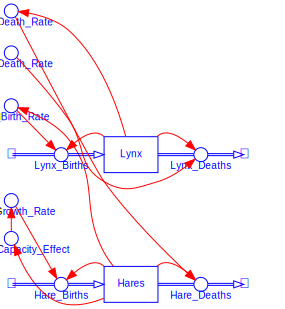

,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,Carrying_Capacity_Effect,Hare_Growth_Rate,Hare_Death_Rate,Lynx_Death_Rate,Lynx_Birth_Rate,Hare_Births,Hare_Deaths,Lynx_Births,Lynx_Deaths,Hares,Lynx
time,,,,,,,,,,,,,,,
0.00,0,300,0.25,0.25,0.940000,0.152280,0.080000,0.12,0.150000,22.842000,12.000000,15.000000,12.000000,150.000000,100.000000
0.25,0,300,0.25,0.25,0.938916,0.152104,0.080600,0.12,0.152710,23.227933,12.308466,15.385583,12.090000,152.710500,100.750000
0.50,0,300,0.25,0.25,0.937824,0.151927,0.081259,0.12,0.155440,23.615661,12.630947,15.788684,12.188867,155.440367,101.573896
0.75,0,300,0.25,0.25,0.936725,0.151750,0.081979,0.12,0.158187,24.004731,12.967987,16.209984,12.296862,158.186545,102.473850
1.00,0,300,0.25,0.25,0.935622,0.151571,0.082762,0.12,0.160946,24.394660,13.320143,16.650179,12.414256,160.945731,103.452130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299.00,0,300,0.25,0.25,0.942403,0.152669,0.212617,0.12,0.143993,21.983347,30.615492,38.269365,31.892621,143.993301,265.771845
299.25,0,300,0.25,0.25,0.943266,0.152809,0.213893,0.12,0.141835,21.673716,30.337545,37.921932,32.083924,141.835264,267.366031
299.50,0,300,0.25,0.25,0.944132,0.152949,0.215060,0.12,0.139669,21.362341,30.037341,37.546676,32.259064,139.669307,268.825533


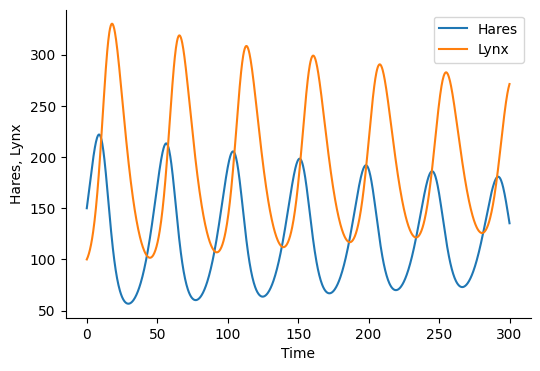

In [20]:
# Predator Prey Model with Carrying Capacity
import selib as se

# Initialize model
init_sd_model(start=0, stop=300, dt=0.25)

# Auxiliaries
add_auxiliary_lookup("Carrying_Capacity_Effect", "Hares",
                     ["0, 500, 1000, 1500, 2000"], ["1, .8, .5, .2, .05"])

add_auxiliary("Hare_Growth_Rate", "0.162 * Carrying_Capacity_Effect")
add_auxiliary("Hare_Death_Rate", ".0008 * Lynx")
add_auxiliary("Lynx_Death_Rate", "0.12")
add_auxiliary("Lynx_Birth_Rate", "0.001 * Hares")

# Stocks
add_stock("Hares", "150", inflows=["Hare_Births"], outflows=["Hare_Deaths"])
add_stock("Lynx", "100", inflows=["Lynx_Births"], outflows=["Lynx_Deaths"])

# Flows
add_flow("Hare_Births", "Hare_Growth_Rate * Hares")
add_flow("Hare_Deaths", "Hare_Death_Rate * Hares")
add_flow("Lynx_Births", "Lynx_Birth_Rate * Lynx")
add_flow("Lynx_Deaths", "Lynx_Death_Rate * Lynx")

d = draw_model_diagram(filename="sd")
results = run_model()
save_graph(["Hares", "Lynx"])

## Brooks's Law Model

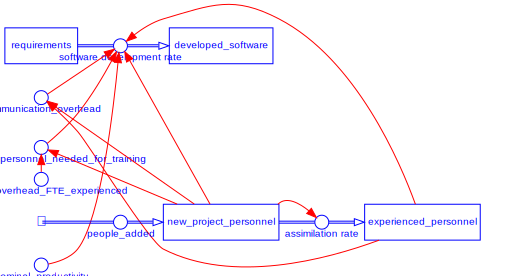

,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,nominal_productivity,training_overhead_FTE_experienced,experienced_personnel_needed_for_training,communication_overhead,software development rate,assimilation rate,people_added,requirements,developed_software,experienced_personnel,new_project_personnel
time,,,,,,,,,,,,,,,
0.0,0,15,0.1,0.1,0.1,25.0,2.500000,24.0,1.292000,0.500000,0.0,500.000000,0.000000,10.000000,10.000000
0.1,0,15,0.1,0.1,0.1,25.0,2.487500,24.0,1.294660,0.497500,0.0,499.870800,0.129200,10.050000,9.950000
0.2,0,15,0.1,0.1,0.1,25.0,2.475062,24.0,1.297307,0.495012,0.0,499.741334,0.258666,10.099750,9.900250
0.3,0,15,0.1,0.1,0.1,25.0,2.462687,24.0,1.299940,0.492537,0.0,499.611603,0.388397,10.149251,9.850749
0.4,0,15,0.1,0.1,0.1,25.0,2.450374,24.0,1.302560,0.490075,0.0,499.481609,0.518391,10.198505,9.801495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14.6,0,15,0.1,0.1,0.1,25.0,2.755430,54.0,1.301101,0.551086,0.0,481.695045,18.304955,18.978281,11.021719
14.7,0,15,0.1,0.1,0.1,25.0,2.741653,54.0,1.302875,0.548331,0.0,481.564935,18.435065,19.033390,10.966610
14.8,0,15,0.1,0.1,0.1,25.0,2.727944,54.0,1.304641,0.545589,0.0,481.434647,18.565353,19.088223,10.911777


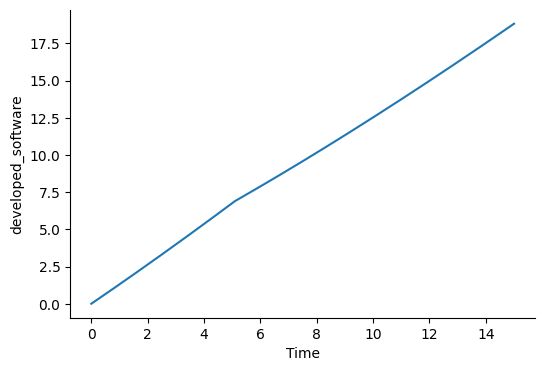

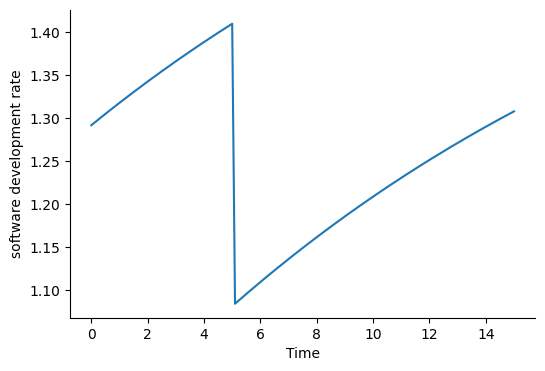

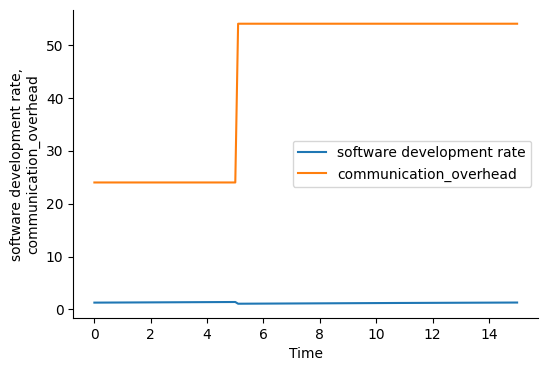

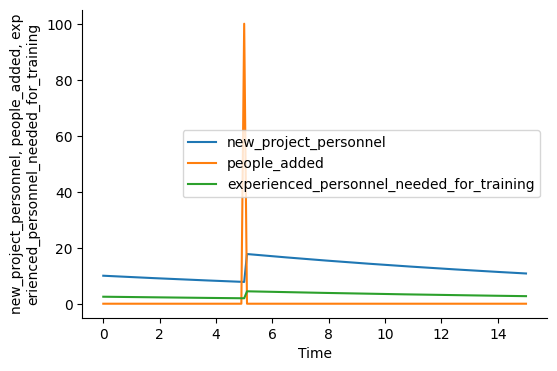

In [21]:
# Brooks's Law Model
from selib import *

init_sd_model(start=0, stop=15, dt=.1)

add_stock("requirements", 500, inflows=[], outflows=["software development rate"])
add_stock("developed_software", 0, inflows=["software development rate"])
add_flow("software development rate", "nominal_productivity*(1.-communication_overhead/100.)*(.8*new_project_personnel+1.2*(experienced_personnel-experienced_personnel_needed_for_training))")

add_stock("experienced_personnel", 10.0, inflows=["assimilation rate"])
add_stock("new_project_personnel", 10.0, inflows=["people_added"], outflows=["assimilation rate"])
add_flow("assimilation rate", "new_project_personnel/20")
add_flow("people_added", "pulse(10,5)")

add_auxiliary("nominal_productivity", .1)
add_auxiliary("training_overhead_FTE_experienced", 25.)
add_auxiliary("experienced_personnel_needed_for_training", "new_project_personnel*training_overhead_FTE_experienced/100.")

add_auxiliary_lookup("communication_overhead", "experienced_personnel + new_project_personnel",
                     ["0, 5, 10, 15, 20, 25, 30"], ["0, 1.5, 6, 13.5, 24, 37.5, 54"])

draw_sd_model()
output = run_model()

plot_graph("developed_software")
plot_graph("software development rate")
plot_graph(["software development rate", "communication_overhead"])
plot_graph(["new_project_personnel", "people_added", "experienced_personnel_needed_for_training"])



## Object Oriented Simulation Examples Using Classes

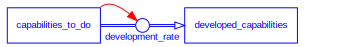

Simulation ends at time = 10.0


,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,development_rate,capabilities_to_do,developed_capabilities
time,,,,,,,
0.0,0,25,0.1,0.1,10,100.0,0.0
0.1,0,25,0.1,0.1,10,99.0,1.0
0.2,0,25,0.1,0.1,10,98.0,2.0
0.3,0,25,0.1,0.1,10,97.0,3.0
0.4,0,25,0.1,0.1,10,96.0,4.0
...,...,...,...,...,...,...,...
9.6,0,25,0.1,0.1,10,4.0,96.0
9.7,0,25,0.1,0.1,10,3.0,97.0
9.8,0,25,0.1,0.1,10,2.0,98.0


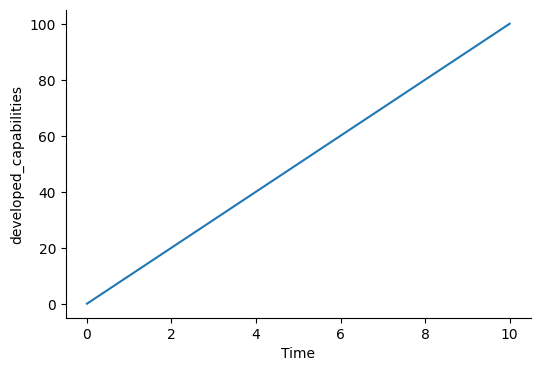

stop time = 10.0


In [22]:
# @title Capability Development Model with Stop Condition
from selib import *

# Initialize SystemDynamicsModel model instance
model = SystemDynamicsModel(start=0, stop=25, dt=0.1, stop_when="developed_capabilities >= 100")

model.add_stock(name="capabilities_to_do", initial=100, outflows=["development_rate"])
model.add_stock(name="developed_capabilities", initial=0, inflows=["development_rate"])
model.add_flow(name="development_rate", equation="IF capabilities_to_do > 0 THEN 10 ELSE 0")

# Draw the model diagram
model.draw_model()

# Run the model simulation
results = model.run_model()

# Plot the 'developed_capabilities'
model.plot_graph('developed_capabilities')

# Print the stop time
stop_time = model.get_stop_time()
print(f'stop time = {stop_time}')

## Monte Carlo Simulation and Output Analysis

End Time Mean for 100 runs =  3.472


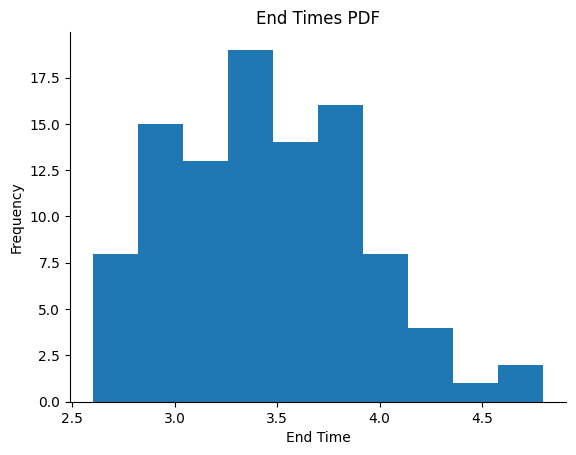

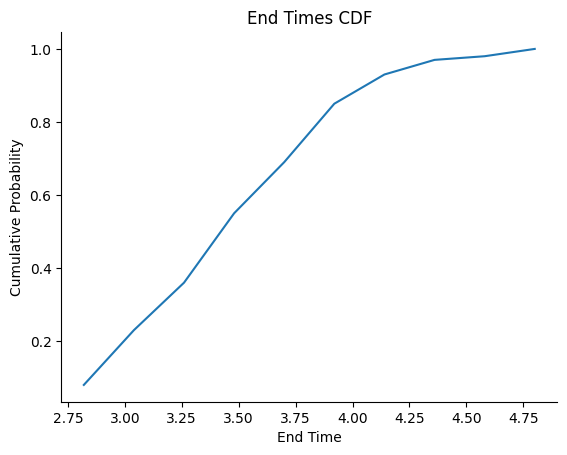

In [23]:
# Monte Carlo simulation for Rayleigh Curve Staffing and end time output analysis
from selib import *
import numpy as np
import matplotlib.pyplot as plt

number_runs = 100

# vary manpower_buildup_parameter and estimated_total_effort in model definition

end_times = []  # initialize output data list

for run in range(number_runs):
    init_sd_model(start=0, stop=6, dt=.2, stop_when="effort_rate <=0")
    add_stock("cumulative_effort", 0, inflows=["effort rate"])
    add_flow(
        "effort_rate",
        "learning_function * (estimated_total_effort - cumulative_effort)")
    add_auxiliary("learning_function", "manpower_buildup_parameter * time")
    add_auxiliary("manpower_buildup_parameter", 'random.uniform(.2, .7)')
    add_auxiliary("estimated_total_effort", f'random.uniform(25, 35)')

    run_model(verbose=False)
    end_times.append(get_stop_time())

print(f'End Time Mean for {number_runs} runs = ', np.mean(end_times))

# PDF histogram with Matplotlib
fig, axis = plt.subplots()
axis.hist(end_times)
axis.set(title=f'End Times PDF', xlabel='End Time', ylabel='Frequency')
plt.savefig(f"end_times_PDF")

# CDF with NumPy and Matplotlib
fig, axis = plt.subplots()
# Use the histogram function to bin the data
histogram_bin_counts, bin_edges = np.histogram (end_times, density=True)
cdf = np.cumsum (histogram_bin_counts)
axis.plot (bin_edges[1:], cdf/cdf[-1])
axis.set(title=f'End Times CDF', xlabel='End Time', ylabel='Cumulative Probability')
plt.savefig(f"end_times_CDF")

# Special Functions

In [24]:
from selib import *

init_sd_model(start=0, stop=6, dt=.2, stop_when="effort_rate <= 0")
add_stock("cumulative_effort", 0, inflows=["effort rate"])
add_flow("effort_rate",
    "learning_function * (estimated_total_effort - cumulative_effort)")
add_auxiliary("learning_function", "manpower_buildup_parameter * time")
add_auxiliary("manpower_buildup_parameter", 'random.uniform(.2, .7)')
add_auxiliary("estimated_total_effort", 'random.uniform(25, 35)')

run_model()

print(f"Project end time is {get_stop_time()}")

Simulation ends at time = 3.2


,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,learning_function,manpower_buildup_parameter,estimated_total_effort,effort_rate,cumulative_effort
time,,,,,,,,,
0.0,0,6,0.2,0.2,0.000000,0.504432,30.830571,0.000000,0.000000
0.2,0,6,0.2,0.2,0.062327,0.311635,31.458854,1.960737,0.000000
0.4,0,6,0.2,0.2,0.186334,0.465835,27.118131,4.979954,0.392147
0.6,0,6,0.2,0.2,0.293407,0.489012,29.853639,8.351989,1.388138
0.8,0,6,0.2,0.2,0.205916,0.257395,31.412157,5.838458,3.058536
1.0,0,6,0.2,0.2,0.613342,0.613342,25.501142,13.048805,4.226228
1.2,0,6,0.2,0.2,0.729484,0.607903,31.036560,17.653934,6.835989
1.4,0,6,0.2,0.2,0.497225,0.355160,30.761369,10.140692,10.366775
1.6,0,6,0.2,0.2,0.554288,0.346430,33.525872,11.712628,12.394914


Project end time is 3.2


## Stop When Condition

In [25]:
# demonstrate stop_when condition to end simulation and the get_stop function
# collect time when the stock reaches zero

from selib import *
init_sd_model(start=0, stop=10, dt=.5, stop_when="stock <= 0")
add_stock("stock", 50, outflows=["outflow_rate"])
add_flow("outflow_rate", "20")

run_model()

print('stop time = ', get_stop_time())


Simulation ends at time = 2.5


,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,outflow_rate,stock
time,,,,,,
0.0,0,10,0.5,0.5,20,50.0
0.5,0,10,0.5,0.5,20,40.0
1.0,0,10,0.5,0.5,20,30.0
1.5,0,10,0.5,0.5,20,20.0
2.0,0,10,0.5,0.5,20,10.0
2.5,0,10,0.5,0.5,20,0.0


stop time =  2.5


## If Then Else

In [26]:
# demonstrate if then else function

from selib import *
init_sd_model(start=0, stop=5, dt=1)

# set conditional variable
# if time > 2 then 1 else 0
add_auxiliary("conditional", "if_then_else(time > 2, 1, 0)")
add_auxiliary("conditional2", "if_then_else(time &lt; 4, .5, .7)")
run_model()

,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,conditional,conditional2
time,,,,,,
0,0,5,1,1,0,0.5
1,0,5,1,1,0,0.5
2,0,5,1,1,0,0.5
3,0,5,1,1,1,0.5
4,0,5,1,1,1,0.7
5,0,5,1,1,1,0.7


,INITIAL TIME,FINAL TIME,TIME STEP,SAVEPER,conditional,conditional2
time,,,,,,
0,0,5,1,1,0,0.5
1,0,5,1,1,0,0.5
2,0,5,1,1,0,0.5
3,0,5,1,1,1,0.5
4,0,5,1,1,1,0.7
5,0,5,1,1,1,0.7
